In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('./BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


1. 앙상블에 필요한 컬럼만 남겨놓기

In [57]:
df = df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [58]:
# 결측치는 없음.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op



* 범주형 변수는 인코딩해서 상관관계 확인해보기
* Customer_Age : 카드이용 이탈은 나이에 따라 달라질 것으로 예상됨 -> 나이가 많을수록 변화에 부정적이나 젊을수록 더 나은 조건을 쫓아가는 경향이 있음.
* Gender : 성별에 따른 차이가 있을지 확인 필요
* Dependent_count : 부양해야 하는 사람 수에 따라 달라질 것으로 예상됨 -> 카드별 혜택이 다르므로 가족에 대한 혜택이 적을수록 이탈률이 높아질 것.
* Income_Category : 소득에 따른 차이 또한 영향을 미칠 것 -> 카드 혜택이 소득 수준에 달라지므로 같은 소득구간 내에서 혜택이 적다면 이탈률이 높아질 것.
* Card_Category : 영향을 미칠 것 같으나 소득과 상관성이 있어 다중공선성 문제가 제기됨 -> Correlation에서 더 높은 변수만 남겨놓을 것.


In [39]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [25]:
df['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [59]:
# 순서가 있는 인코딩 : 더 연관있는 항목끼리 가까운 숫자 부여
df['Attrition_Flag']=df['Attrition_Flag'].replace({'Existing Customer':0,'Attrited Customer':1})
df['Gender']=df['Gender'].replace({'M':0,'F':1})
df['Education_Level']=df['Education_Level'].replace({'Uneducated':0,'Unknown':1,'High School':2, 'College':3,'Graduate':4,   
       'Post-Graduate':5, 'Doctorate':6})
df['Marital_Status']=df['Marital_Status'].replace({'Married':0, 'Divorced':1, 'Single':2, 'Unknown':3})
df['Income_Category']=df['Income_Category'].replace({'$60K - $80K':0, 'Less than $40K':1, '$80K - $120K':2, '$40K - $60K':3,
       '$120K +':4, 'Unknown':5})

In [60]:
# Card_Category는 Income_Category와 상관관계가 있을 것으로 예상되어 제외하기로 결정.
df.drop('Card_Category', axis=1, inplace=True)
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,2,0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,4,2,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,4,0,2,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,2,3,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,0,0,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,0,2,4,2,3,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,0,2,1,1,3,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,1,1,2,0,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,0,2,4,3,3,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


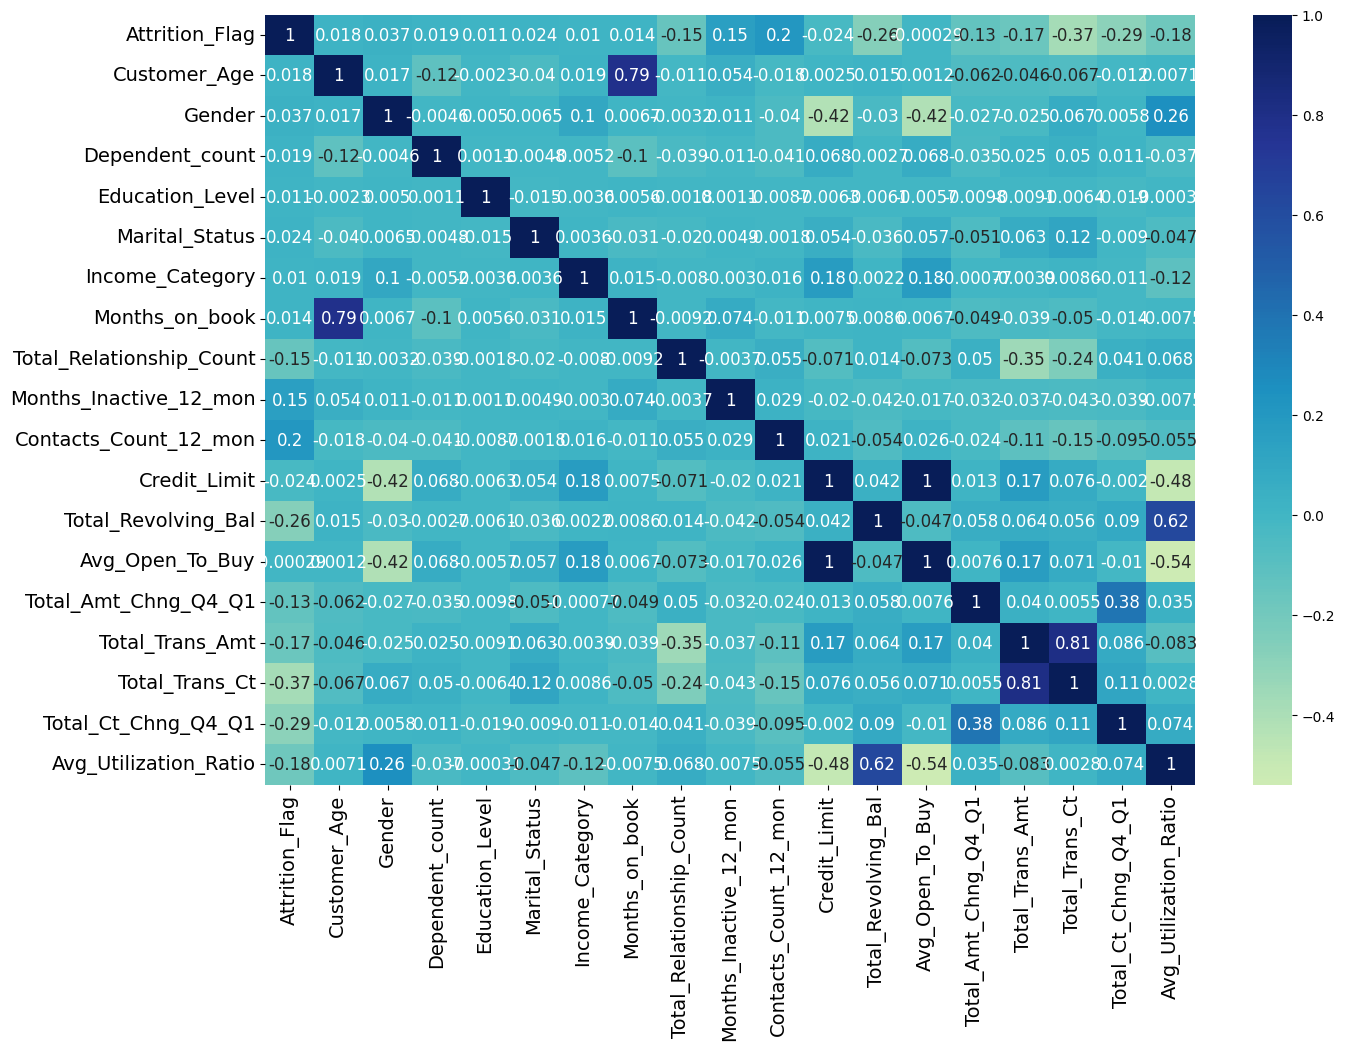

In [64]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.select_dtypes(include=['int', 'float']).corr(), annot=True, center=0,cmap='YlGnBu',annot_kws={'size': 12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()